In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [2]:
# 한글 출력!
plt.rc("font",family="Malgun Gothic")

In [10]:
# KRX: 005930
samsung =fdr.DataReader("005930")
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-12-24,1522,1549,1488,1532,941106,NaN
1998-12-28,1570,1570,1503,1546,537290,0.009138
1999-01-04,1776,1776,1624,1693,666160,0.095084
1999-01-05,1692,1712,1649,1673,643209,-0.011813
1999-01-06,1702,1720,1651,1718,645110,0.026898


In [ ]:
# 시계열 데이터 ==== 인덱스가 없다 ==== 독립변인이  Date로 정해져있다
# Change: 어제에 비해 얼마나 변했나 (변화량)
# Volume: 거래량
# Close : 종가 

<function matplotlib.pyplot.show(close=None, block=None)>

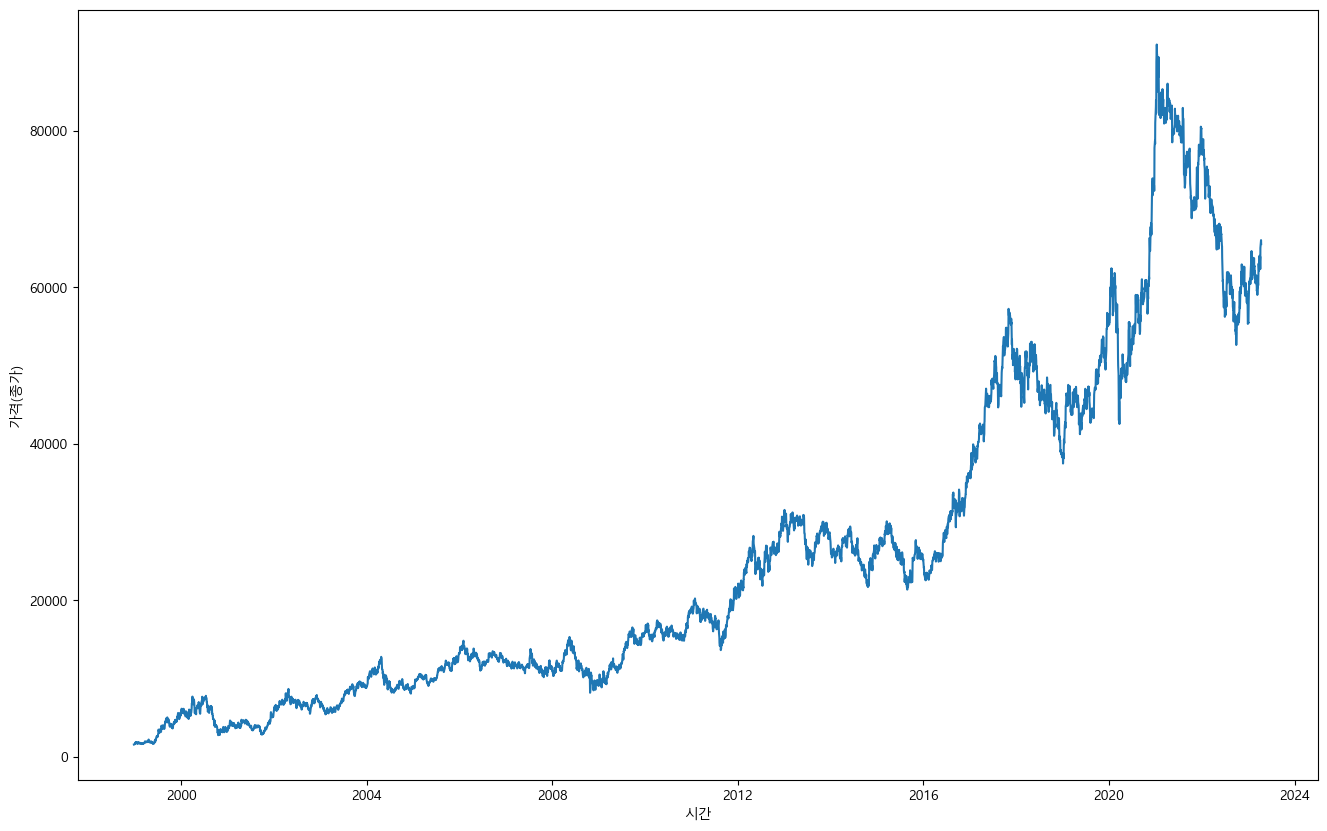

In [12]:
plt.figure(figsize=(16,10))
sns.lineplot(x=samsung.index, y="Close",data=samsung)
plt.xlabel("시간")
plt.ylabel("가격(종가)")
plt.show

In [13]:
def show_ts(data):
    plt.figure(figsize=(13,5))
    sns.lineplot(x=samsung.index, y="Close",data=samsung)
    plt.xlabel("시간")
    plt.ylabel("가격(종가)")
    plt.show()

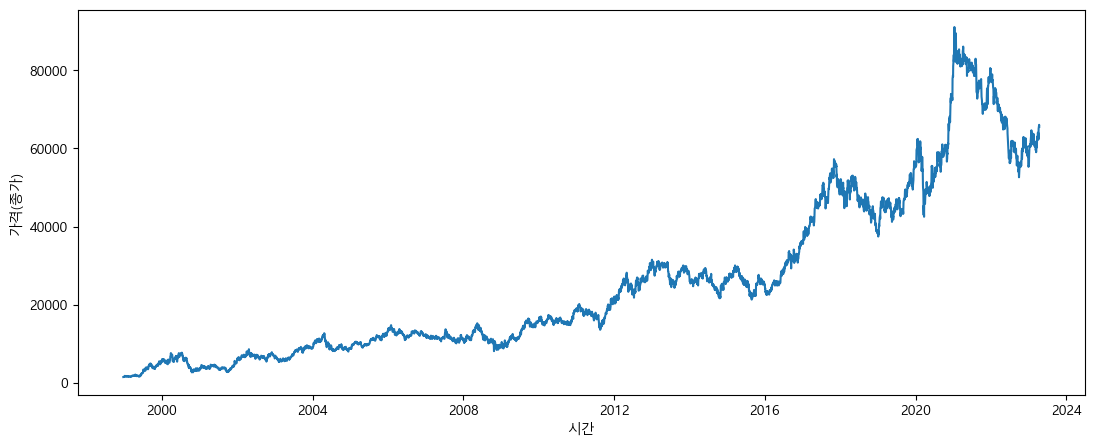

In [14]:
show_ts(samsung)

In [15]:
# 지금은 time_steps의 magix number를 내가 직접 짜야한다 

# 하지만 prophet 해당 년도 구분을 자동으로 해줄것이다. 
# magix number를 만들어 준다
time_steps=[["1990", "2000"],
            ["2000", "2010"],
            ["2010", "2015"],
            ["2015", "2020"],
            ["2020", "2030"]]


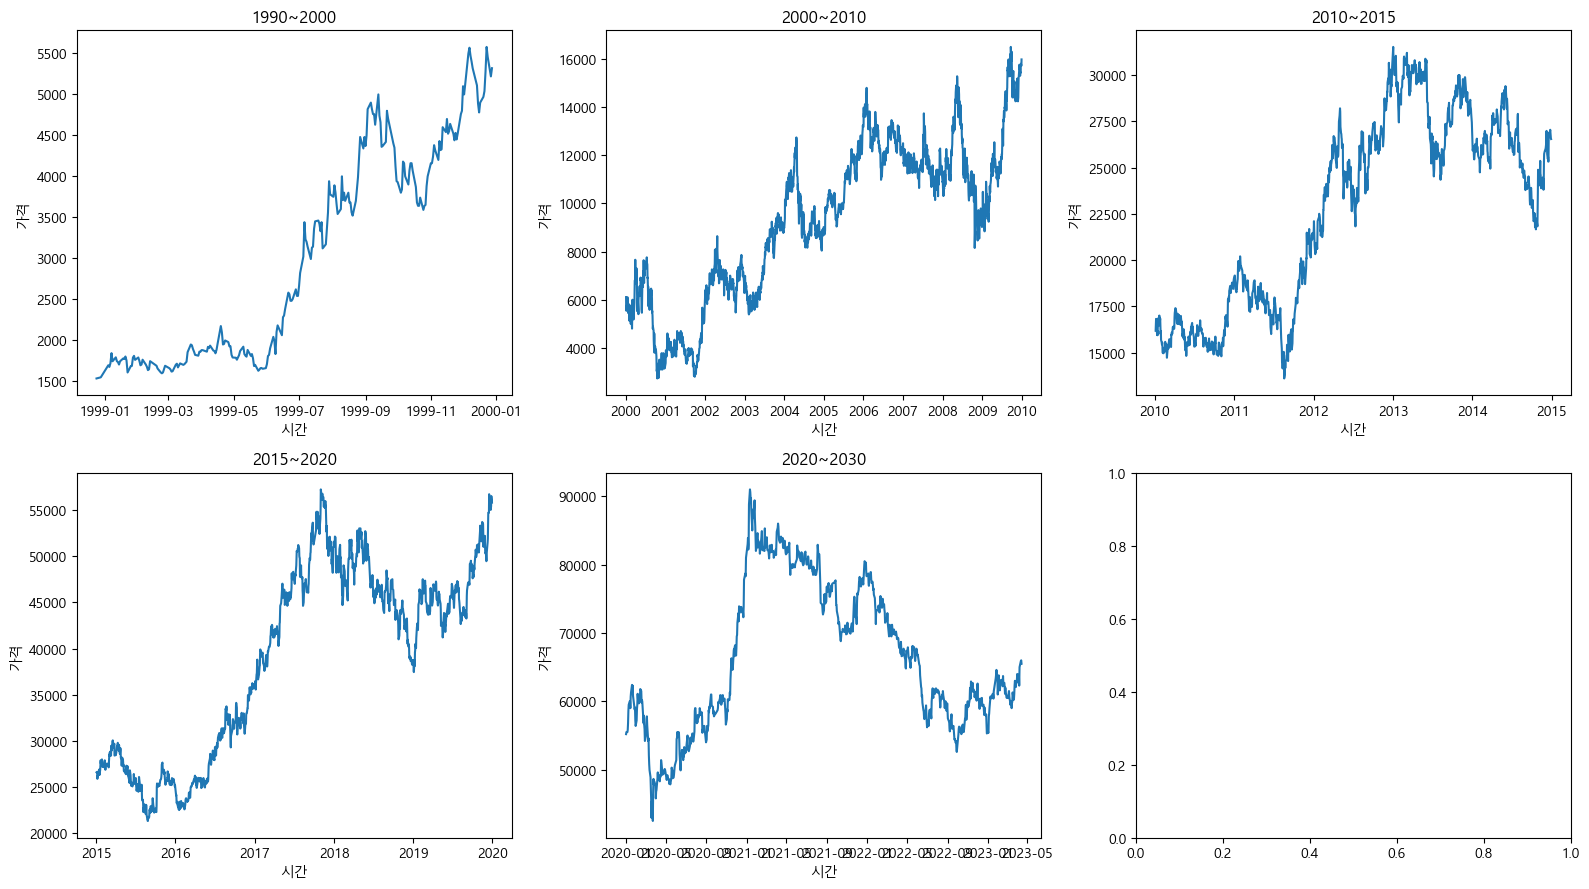

In [19]:
# 튜플일때만 가능! 
fig, axes = plt.subplots(2,3)

# 큰 화면으로 보여주겠다
fig.set_size_inches(16,9)


for i in range(5):
    ax = axes[i//3, i%3]
    # [i][0] == time_steps="1990"  [i][1] == 
    df= samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])]
    
    # (x,y,subplot형식== 단독모듈)
    sns.lineplot(x=df.index, y=df["Close"], ax=ax)
    # index => date 
    ax.set_title(f"{time_steps[i][0]}~{time_steps[i][1]}")
    ax.set_xlabel("시간")
    ax.set_ylabel("가격") 
plt.tight_layout()
plt.show()

In [20]:
# 그럼 내가 어떻게  할 것이냐!
# prophet설치 => magix number를 자동으로 만들어 준다

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


# y 컬럼과 ds 컬럼이 존재해 함


In [24]:
# 데이터를 가공한다 ====> !!! 시계열은 na값을 날리면 안된다 !!!!
stock = fdr.DataReader("005930","2022")

# 1... y와 ds를 만든다
stock["y"] = stock["Close"]
stock["ds"] = stock.index
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,78600,2022-01-03
2022-01-04,78800,79200,78300,78700,12427416,0.001272,78700,2022-01-04
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,77400,2022-01-05
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,76900,2022-01-06
2022-01-07,78100,78400,77400,78300,15163757,0.018205,78300,2022-01-07


In [25]:
# 2.  RAW 데이터를 만든다
m = Prophet()
m.fit(stock)

16:22:09 - cmdstanpy - INFO - Chain [1] start processing
16:22:09 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# 3. 내가 원하는 기한을 정한다!  (periods=30) = 한달 기준
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
342,2023-05-09
343,2023-05-10
344,2023-05-11
345,2023-05-12
346,2023-05-13


In [29]:
forecast = m.predict(future)
forecast.tail()

# yhat = 예측값!!!!

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
342,2023-05-09,64072.079937,61394.754644,66202.281911,63906.312320,64198.205885,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,0.0,0.0,0.0,63901.909904
343,2023-05-10,64100.308690,61449.840898,66310.402420,63921.287260,64234.164625,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,0.0,0.0,0.0,63932.369444
344,2023-05-11,64128.537443,61437.218667,66338.588692,63933.188092,64270.878247,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,0.0,0.0,0.0,63910.699782
345,2023-05-12,64156.766196,61634.714270,66600.221225,63949.512438,64308.801121,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,0.0,0.0,0.0,64137.238837
346,2023-05-13,64184.994949,62139.951014,67033.170436,63966.610546,64345.452597,349.894022,349.894022,349.894022,349.894022,349.894022,349.894022,0.0,0.0,0.0,64534.888971


In [31]:
# "ds", "yhat","yhat_lower", "yhat_upper"
# iloc = 행이나 칼럼의 순서를 나타내는 정수 = integer location
forecast[["ds", "yhat","yhat_lower", "yhat_upper"]].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
307,2023-03-31,62951.631210,60639.210459,65422.527299
308,2023-04-03,62931.531191,60496.190511,65396.432672
309,2023-04-04,62913.903549,60563.200996,65155.688376
310,2023-04-05,62944.363088,60674.997025,65467.904479
311,2023-04-06,62922.693426,60413.657930,65356.331933
312,2023-04-07,63149.232481,60621.920746,65429.489004
313,2023-04-10,63129.132462,60650.011858,65413.245037
314,2023-04-11,63111.504820,60739.851276,65368.433177
315,2023-04-12,63141.964359,60807.377118,65557.598709
316,2023-04-13,63120.294698,60647.668148,65484.075530


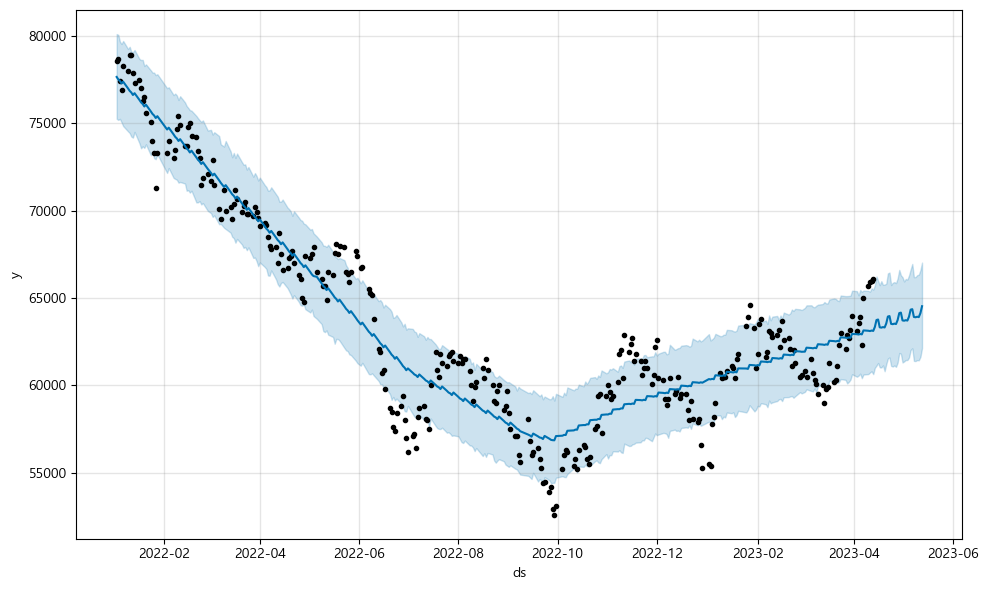

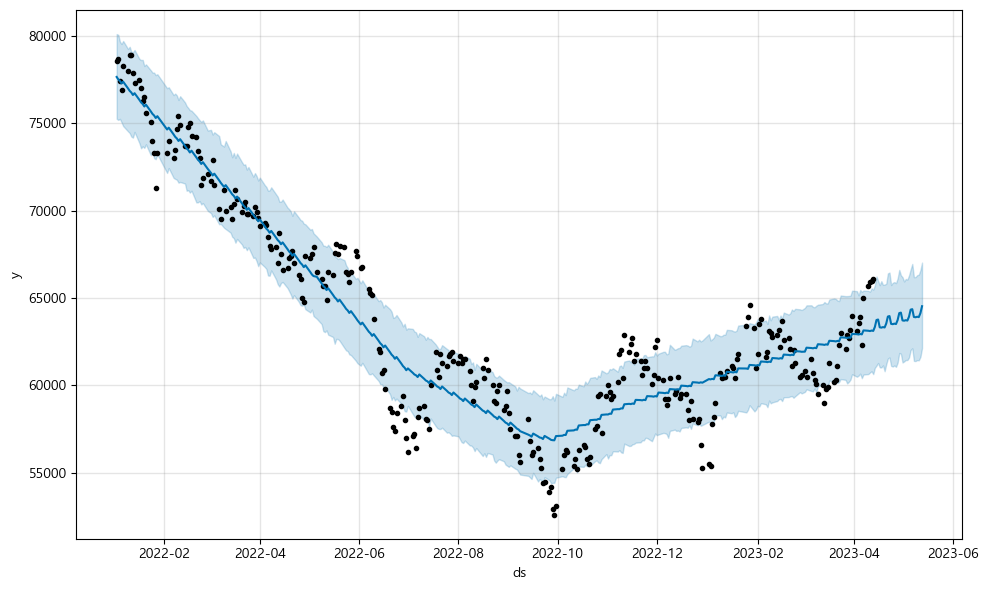

In [32]:
# 전체 데이터 확인 
m.plot(forecast)

In [33]:
# 이왕이면 plotly를 사용하세요! 
plot_plotly(m, forecast)


In [34]:
# 쪼개서 보기! == plot_components_plotly
# 세부 컴포넌트를 이용
plot_components_plotly(m,forecast)


In [40]:
from prophet.plot import add_changepoints_to_plot

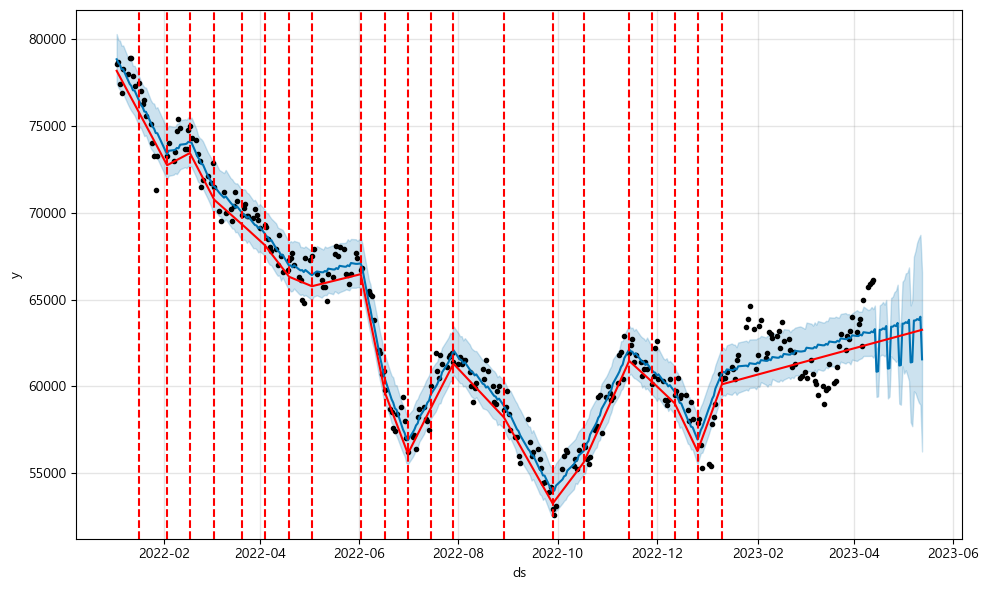

In [41]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

16:57:07 - cmdstanpy - INFO - Chain [1] start processing
16:57:07 - cmdstanpy - INFO - Chain [1] done processing


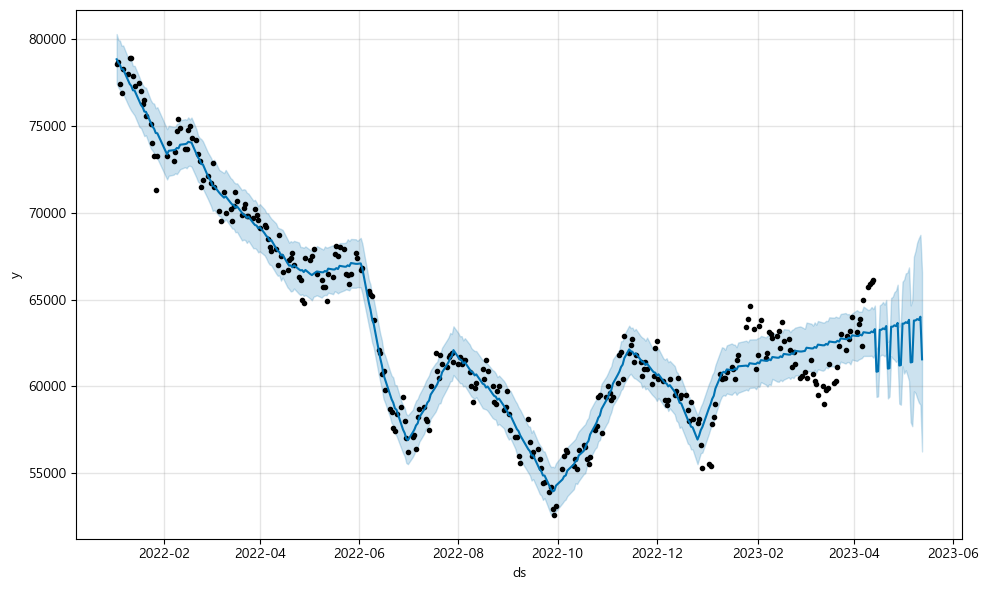

In [37]:
# 유연성 => 계수가 낮으면 과소적합, 높으면 과대적합 ==> 하이퍼 파라메타 (사람이 한다)
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)

In [ ]:
# 서울시에서 코로나 확진자 발표 데이터 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [ ]:
# 한글 출력!
plt.rc("font",family="Malgun Gothic")

In [42]:
covid19 = pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_11744\2557537514.py:1: DtypeWarning:

Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.



,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
